In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


In [4]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [5]:
# Generate random data for SVM practice
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

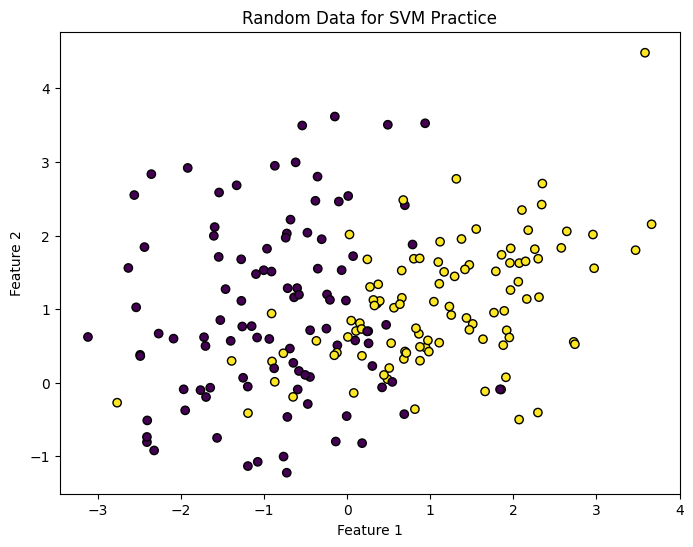

In [7]:
# Visualize the data
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', edgecolor='k')
plt.title('Random Data for SVM Practice')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)# Train a Support Vector Machine with linear kernel


SVC(kernel='linear')

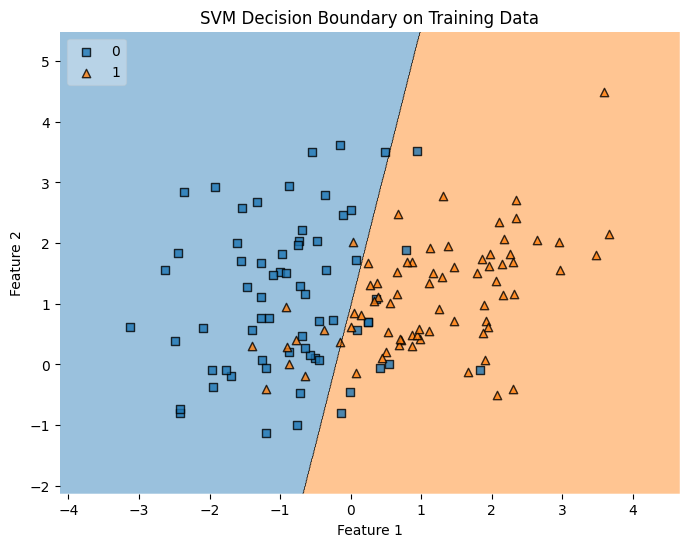

In [9]:
# Plot the decision boundary
plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, clf=svm_model, legend=2)
plt.title('SVM Decision Boundary on Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [10]:
# Evaluate the model on test data
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy on test data: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        34
           1       0.80      0.92      0.86        26

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.88      0.87      0.87        60



In [13]:
svm_model.score(X_test, y_test)*100

86.66666666666667

In [14]:
svm_model.score(X_train, y_train)*100

85.0

In [4]:
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate random data for SVR practice
x, y = make_regression(n_samples=200, n_features=1, noise=0.1, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
svr_model = SVR(kernel='linear', C=1.0)
svr_model.fit(x_train, y_train)

y_pred = svr_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')



Mean Squared Error: 0.13
R-squared Score: 1.00


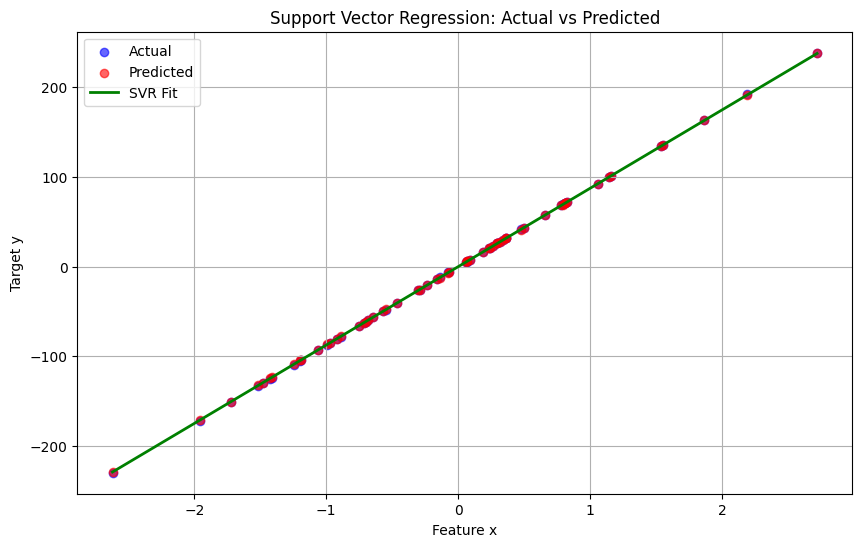

In [9]:
import matplotlib.pyplot as plt

# Scatter plot of the SVR data and predictions
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(x_test, y_pred, color='red', label='Predicted', alpha=0.6)

# Sort for smooth line
x_test_sorted = x_test[x_test.argsort(axis=0).ravel()]
y_pred_sorted = svr_model.predict(x_test_sorted)

plt.plot(x_test_sorted, y_pred_sorted, color='green', linewidth=2, label='SVR Fit')
plt.title('Support Vector Regression: Actual vs Predicted')
plt.xlabel('Feature x')
plt.ylabel('Target y')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
svr_model.score(x_test, y_test)*100

99.99839655331732

In [8]:
svr_model.score(x_train, y_train)*100

99.99860191199234

Linear Kernel SVR on Polynomial Data:
MSE: 112.29, R²: 0.22

Polynomial Kernel SVR on Polynomial Data:
MSE: 105.23, R²: 0.27


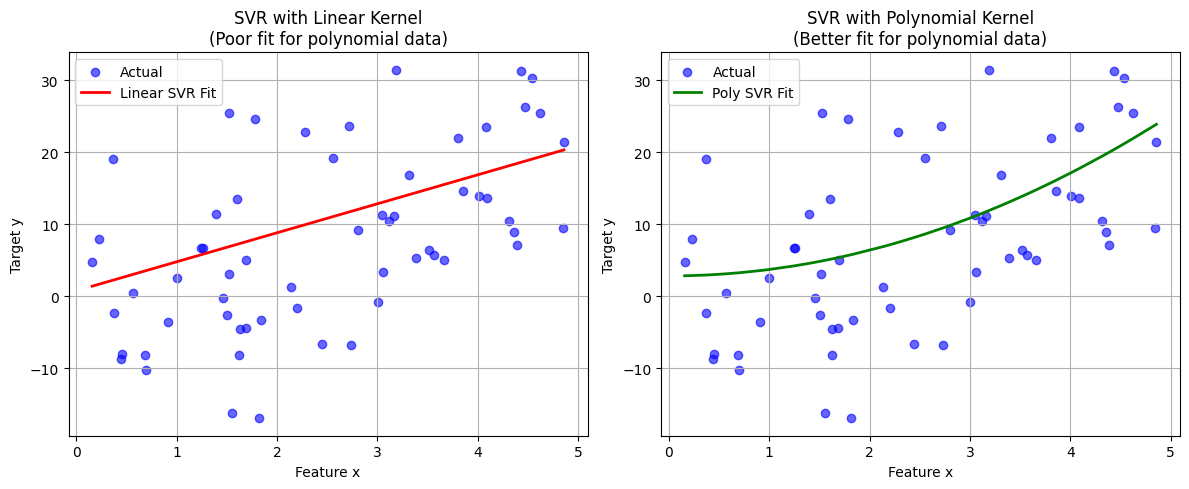

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate polynomial data for SVR demonstration
np.random.seed(42)
x_poly = np.sort(5 * np.random.rand(200, 1), axis=0)
y_poly = (x_poly.ravel() ** 2) + np.random.randn(200) * 10  # Quadratic relationship with noise

# Split the data
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly, y_poly, test_size=0.3, random_state=42)

# Train SVR with linear kernel (will fit poorly on polynomial data)
svr_linear = SVR(kernel='linear', C=1.0)
svr_linear.fit(x_train_poly, y_train_poly)
y_pred_linear = svr_linear.predict(x_test_poly)

# Train SVR with polynomial kernel (should fit better)
svr_poly = SVR(kernel='poly', degree=2, C=1.0)
svr_poly.fit(x_train_poly, y_train_poly)
y_pred_poly = svr_poly.predict(x_test_poly)

# Evaluate
mse_linear = mean_squared_error(y_test_poly, y_pred_linear)
r2_linear = r2_score(y_test_poly, y_pred_linear)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print("Linear Kernel SVR on Polynomial Data:")
print(f"MSE: {mse_linear:.2f}, R²: {r2_linear:.2f}")
print("\nPolynomial Kernel SVR on Polynomial Data:")
print(f"MSE: {mse_poly:.2f}, R²: {r2_poly:.2f}")

# Plot
plt.figure(figsize=(12, 5))

# Linear kernel plot
plt.subplot(1, 2, 1)
plt.scatter(x_test_poly, y_test_poly, color='blue', label='Actual', alpha=0.6)
x_test_sorted = x_test_poly[x_test_poly.argsort(axis=0).ravel()]
plt.plot(x_test_sorted, svr_linear.predict(x_test_sorted), color='red', linewidth=2, label='Linear SVR Fit')
plt.title('SVR with Linear Kernel\n(Poor fit for polynomial data)')
plt.xlabel('Feature x')
plt.ylabel('Target y')
plt.legend()
plt.grid(True)

# Polynomial kernel plot
plt.subplot(1, 2, 2)
plt.scatter(x_test_poly, y_test_poly, color='blue', label='Actual', alpha=0.6)
plt.plot(x_test_sorted, svr_poly.predict(x_test_sorted), color='green', linewidth=2, label='Poly SVR Fit')
plt.title('SVR with Polynomial Kernel\n(Better fit for polynomial data)')
plt.xlabel('Feature x')
plt.ylabel('Target y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()